<a href="https://colab.research.google.com/github/nandhuv-5307/sentiment/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!unzip -o "/content/archive .zip" # Unzip the file, -o overwrites existing files
train_data=pd.read_csv("train.csv")
train_data

Archive:  /content/archive .zip
  inflating: movies.csv              
  inflating: sample.csv              
  inflating: test.csv                
  inflating: train.csv               


,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [ ]:
train_data.shape

(162758, 5)

In [ ]:
train_data.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,6447
sentiment,0


In [ ]:
#metadata
movie_data=pd.read_csv("movies.csv")
movie_data

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN
143256,wonder_hermione_granger_hulk_v,Wonder Hermione Granger Hulk V,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Dwayne Clayton,NaN,NaN,NaN


In [ ]:
movie_data.shape  #rows and columns in this

(143258, 14)

In [ ]:
movie_data.drop_duplicates(subset='movieid',inplace=True)
movie_data

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,NaN,NaN,NaN,2019-01-03,131.0,"Action, Mystery & thriller",Hindi,Reginald Davis,NaN,NaN,NaN
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN


In [ ]:
movie_data.isnull().sum()

,0
movieid,0
title,0
audienceScore,62690
rating,114626
ratingContents,114626
releaseDateTheaters,100014
releaseDateStreaming,57131
runtimeMinutes,12494
genre,10003
originalLanguage,12384


In [ ]:
data_df=pd.merge(train_data,movie_data,on='movieid',how='left')
data_df

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,NaN,2004-01-06,96.0,Romance,English,Gertrude Fonner,NaN,NaN,NaN
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...",2016-02-12,2016-05-24,102.0,"Comedy, Adventure",English,Susan Oley,$28.8M,Paramount Pictures,NaN
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']",NaN,2022-06-17,90.0,"Comedy, Drama",English,Bryant Reams,NaN,NaN,Dolby Digital
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,1996-11-16,1998-11-03,88.0,"Kids & family, Holiday, Comedy",English,Lisa Cruz,$60.6M,20th Century Fox,Surround


In [ ]:
data_df.shape #rows and columns

(162758, 18)

In [ ]:
data_df.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,6447
sentiment,0
title,0
audienceScore,13248
rating,63724
ratingContents,63724
releaseDateTheaters,35834


In [ ]:
data_df.head()  #gives overview

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [ ]:
#info about merge_data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [ ]:
data_df.describe()   #stastical summary of numerical columns in the data Dataframe

,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000


In [ ]:
from sklearn.impute import SimpleImputer

# Load the train dataset
train_data = pd.read_csv('train.csv')

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='missing')

# Impute the missing values in the 'reviewText' column
train_data['reviewText'] = imputer.fit_transform(train_data[['reviewText']]).ravel()

# Display the first and last few rows of the 'reviewText' column
print(train_data['reviewText'])

# Verify that the missing values have been filled
print(train_data['reviewText'].isnull().sum())  # This should output 0 if all missing values have been filled

0         Henry Selick’s first movie since 2009’s Corali...
1         With a cast that reads like the Vogue Oscar pa...
2         Creed II does not give us anything but another...
3         I know what you're thinking, but this is no Li...
4         Director Fernando Meirelles tells the story wi...
                                ...                        
162753    A top-notch thriller with genuine surprises an...
162754    Some people find Derek Zoolander funny and lik...
162755    This fun, gentle comedy focuses mainly on them...
162756    The film is rescued by a strong third act, but...
162757            A peerless exercise in stimulus response.
Name: reviewText, Length: 162758, dtype: object
0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
# Create DataFrame
data_df = pd.DataFrame(data_df)
# Create SimpleImputer object, using mean to fill missing values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the 'audienceScore' column
data_df['audienceScore'] = imputer.fit_transform(data_df[['audienceScore']])

# Display the 'audienceScore' column
print(data_df['audienceScore'])

0         65.000000
1         65.214541
2         80.000000
3         65.214541
4         97.000000
            ...    
162753    65.214541
162754    20.000000
162755    78.000000
162756    39.000000
162757    57.000000
Name: audienceScore, Length: 162758, dtype: float64


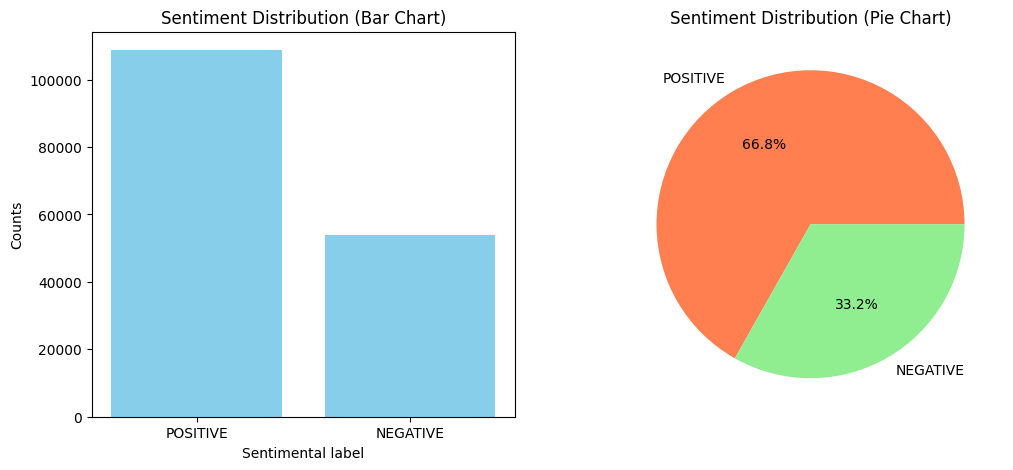

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into data_df
data_df = pd.read_csv('train.csv')  # Adjust the path to your CSV file

# Calculate sentiment counts
sentiment_counts = data_df['sentiment'].value_counts()
sentiments = sentiment_counts.index
counts = sentiment_counts.values

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
ax1.bar(sentiments, counts, color=['skyblue', 'skyblue'])
ax1.set_title('Sentiment Distribution (Bar Chart)')
ax1.set_xlabel('Sentimental label')
ax1.set_ylabel('Counts')

# Pie chart
ax2.pie(counts, labels=sentiments, autopct='%1.1f%%', colors=['coral', 'lightgreen'])
ax2.set_title('Sentiment Distribution (Pie Chart)')

plt.show()

In [ ]:
import pandas as pd

# Load your data into data_df
data_df = pd.read_csv('movies.csv')  # Adjust the path to your CSV file

# Display the columns in the DataFrame
print(data_df.columns)

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')


In [ ]:
# Separate independent (reviewText) and dependent variable (Sentiment)
X = train_data['reviewText']  # Independent variable
y = train_data['sentiment']   # Dependent variable

# Display the independent and dependent variables
print("Independent variable (X):")
print(X)
print("\nDependent variable (y):")
print(y)

Independent variable (X):
0         Henry Selick’s first movie since 2009’s Corali...
1         With a cast that reads like the Vogue Oscar pa...
2         Creed II does not give us anything but another...
3         I know what you're thinking, but this is no Li...
4         Director Fernando Meirelles tells the story wi...
                                ...                        
162753    A top-notch thriller with genuine surprises an...
162754    Some people find Derek Zoolander funny and lik...
162755    This fun, gentle comedy focuses mainly on them...
162756    The film is rescued by a strong third act, but...
162757            A peerless exercise in stimulus response.
Name: reviewText, Length: 162758, dtype: object

Dependent variable (y):
0         POSITIVE
1         NEGATIVE
2         POSITIVE
3         POSITIVE
4         POSITIVE
            ...   
162753    POSITIVE
162754    NEGATIVE
162755    POSITIVE
162756    NEGATIVE
162757    POSITIVE
Name: sentiment, Length: 162758,

In [ ]:
#Tokenization
train_data['reviewText']=train_data['reviewText'].astype(str)
def tokenize_text(reviewText):
    return reviewText.split()
train_data['reviewText']=train_data['reviewText'].apply(tokenize_text)

In [ ]:
#numerical values
import re
train_data['reviewText']=train_data['reviewText'].astype(str)
def remove_numerical_values(reviewText):
    return re.sub(r'\d+',' ',reviewText)
train_data['reviewText']=train_data['reviewText'].apply(remove_numerical_values)

In [ ]:
#Remove Short words
def remove_short_words(reviewText,min_word_length=3):
    return re.sub(r'\b\w{1,'+ str(min_word_length-1)+r'}\b',' ',reviewText)
train_data['reviewText']=train_data['reviewText'].apply(remove_short_words)

In [ ]:
# URL remove
def remove_urls(reviewText):
    return re.sub(r'&\S#\Shttp\S+|www\S+|https\S+', '', reviewText)
    # This part of the pattern matches URLs that might have special characters before

train_data['reviewText'] = train_data['reviewText'].apply(remove_urls)

In [ ]:
def remove_special_chars1(reviewText):
    return re.sub(r'&#;&#;', '', reviewText)

# Function to remove special characters ' ' ' ' '
def remove_special_chars2(reviewText):
    return re.sub(r' ', ' ', reviewText)

def remove_empty_spaces(reviewText):
    return reviewText.strip(' ')

train_data['reviewText'] = train_data['reviewText'].apply(remove_special_chars1)
train_data['reviewText'] = train_data['reviewText'].apply(remove_special_chars2)
train_data['reviewText'] = train_data['reviewText'].apply(remove_empty_spaces)

In [ ]:
import re
import string
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def process_text(text):
    if isinstance(text, str):
        #lowercasing
        text = text.lower()
        #removing special characters and punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        #remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        #remove numerical values
        text = re.sub(r'\d+', '', text)
        #tokenization
        text = re.findall(r'\b\w+\b', text)
        #negation handling
        text = ['not_' + word if text[i - 1] == 'not' else word for i, word in enumerate(text)]
        #remove stop words
        text = [word for word in text if word not in ENGLISH_STOP_WORDS]
        return text
    else:
        return []

preprocessor = Pipeline([
    ('text_processing', FunctionTransformer(lambda x: x.apply(process_text)))
])

train_data['reviewText'] = preprocessor.fit_transform(train_data['reviewText'])
train_data['reviewText']

,reviewText
0,"[henry, selick, movie, coraline, fifth, stopmo..."
1,"[cast, reads, like, vogue, oscar, party, guest..."
2,"[creed, does, not_give, slightly, superior, ro..."
3,"[know, thinking, limitless, bradley, cooper, c..."
4,"[director, fernando, meirelles, tells, story, ..."
...,...
162753,"[topnotch, thriller, genuine, surprises, great..."
162754,"[people, derek, zoolander, funny, likable, end..."
162755,"[fun, gentle, comedy, focuses, mainly, themes,..."
162756,"[film, rescued, strong, act, getting, torture]"


In [ ]:
y=train_data['sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'reviewText' is a list of preprocessed tokens
train_data['reviewText'] = train_data['reviewText'].apply(lambda tokens: ' '.join(tokens))

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()  # You can adjust max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['reviewText'])

# Print the TF-IDF matrix or use it for further analysis
tfidf_matrix


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1726088 stored elements and shape (162758, 83539)>

In [ ]:
#from scipy.sparse import hstack

# Concatenate scaled 'audienceScore' and 'runtimeMinutes' arrays with the TF-IDF matrix
#tfidf_matrix = hstack((scaled_audience_score, scaled_runtime_minutes, tfidf_matrix))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.3,random_state=42)

In [ ]:
baseline_model = LogisticRegression(max_iter=1000)

# Hyperparameter tuning
param_grid = {'C': [0.1, 1]}
grid_search = GridSearchCV(baseline_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

baseline_model = grid_search.best_estimator_
baseline_model.fit(X_train, y_train)

# Model evaluation
y_pred = baseline_model.predict(X_test)
print("Baseline Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Baseline Model:
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.54      0.63     16201
    POSITIVE       0.80      0.92      0.85     32627

    accuracy                           0.79     48828
   macro avg       0.78      0.73      0.74     48828
weighted avg       0.79      0.79      0.78     48828

[[ 8697  7504]
 [ 2671 29956]]


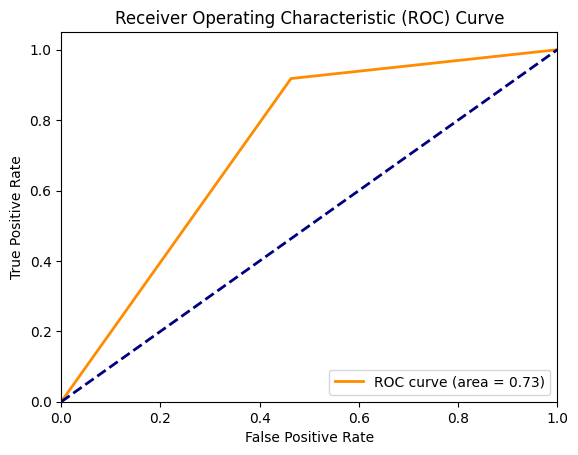

AUC Score: 0.7274770008099302


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
y_test_binary = np.where(y_test == 'POSITIVE', 1, 0)
y_pred_binary = np.where(y_pred == 'POSITIVE', 1, 0)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)

In [ ]:
from sklearn.svm import LinearSVC

# LinearSVC with default hyperparameters
LinearSVC_model = LinearSVC()

# Hyperparameter tuning using GridSearchCV for LinearSVC
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(LinearSVC_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
linear_model = grid_search.best_estimator_

# Model evaluation for LinearSVC
y_pred = linear_model.predict(X_test)
print("LinearSVC Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LinearSVC Model:
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.53      0.63     16201
    POSITIVE       0.80      0.92      0.86     32627

    accuracy                           0.79     48828
   macro avg       0.78      0.72      0.74     48828
weighted avg       0.79      0.79      0.78     48828

[[ 8525  7676]
 [ 2514 30113]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB  # Add this import

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create the Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Hyperparameter tuning
param_grid = {
    'alpha': [0.1, 1.0, 2.0]
}

grid_search = GridSearchCV(mnb_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

mnb_model = grid_search.best_estimator_

# Model evaluation
y_pred = mnb_model.predict(X_test) # Evaluate on a smaller sample
print("Multinomial Naive Bayes Model:")
print(classification_report(y_test, y_pred))

cnf = confusion_matrix(y_test, y_pred)
print(cnf)

Multinomial Naive Bayes Model:
              precision    recall  f1-score   support

    NEGATIVE       0.75      0.47      0.58     16201
    POSITIVE       0.78      0.92      0.84     32627

    accuracy                           0.77     48828
   macro avg       0.77      0.70      0.71     48828
weighted avg       0.77      0.77      0.76     48828

[[ 7585  8616]
 [ 2488 30139]]
